In [1]:
# Adapted from: https://github.com/lazyprogrammer/machine_learning_examples/blob/master/unsupervised_class3/
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import pandas as pd
import scipy.misc
from sklearn.utils import shuffle
from sklearn.mixture import BayesianGaussianMixture


In [2]:
def clamp_sample(x):
  x = np.minimum(x, 1)
  x = np.maximum(x, 0)
  return x

def get_mnist(limit=None):
  print("Reading in and transforming data...")
  df = pd.read_csv('large_files/train.csv')
  data = df.values
  # np.random.shuffle(data)
  X = data[:, 1:] / 255.0 # data is from 0..255
  Y = data[:, 0]
  X, Y = shuffle(X, Y)
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y

In [3]:
class BayesClassifier:
  def fit(self, X, Y):
    # assume classes are numbered 0...K-1
    self.K = len(set(Y))

    self.gaussians = []
    self.p_y = np.zeros(self.K)
    for k in range(self.K):
      print("Fitting gmm", k)
      Xk = X[Y == k]
      self.p_y[k] = len(Xk)
      gmm = BayesianGaussianMixture(10)
      gmm.fit(Xk)
      self.gaussians.append(gmm)
    # normalize p(y)
    self.p_y /= self.p_y.sum()

  def sample_given_y(self, y):
    gmm = self.gaussians[y]
    sample = gmm.sample()
    # note: sample returns a tuple containing 2 things:
    # 1) the sample
    # 2) which cluster it came from
    # we'll use (2) to obtain the means so we can plot
    # them like we did in the previous script
    # we cheat by looking at "non-public" params in
    # the sklearn source code
    mean = gmm.means_[sample[1]]
    return clamp_sample( sample[0].reshape(28, 28) ), mean.reshape(28, 28)

  def sample(self):
    y = np.random.choice(self.K, p=self.p_y)
    return clamp_sample( self.sample_given_y(y) )

Reading in and transforming data...


Fitting gmm 0


Fitting gmm 1


Fitting gmm 2


Fitting gmm 3


Fitting gmm 4


Fitting gmm 5


Fitting gmm 6


Fitting gmm 7


Fitting gmm 8


Fitting gmm 9


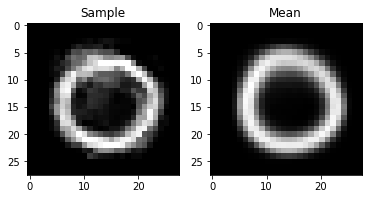

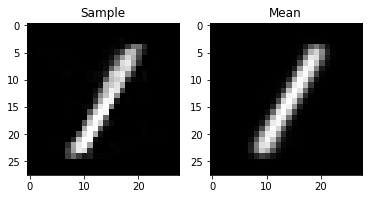

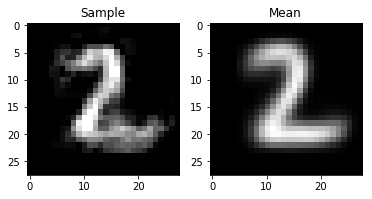

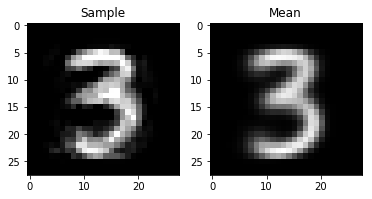

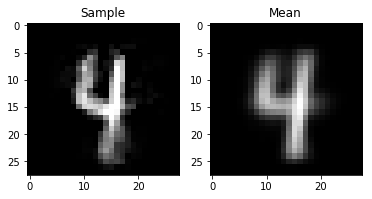

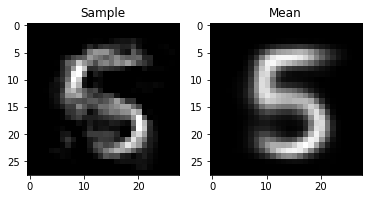

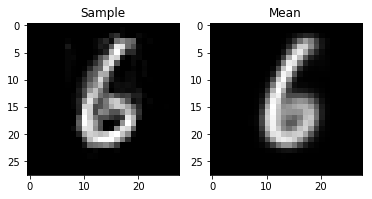

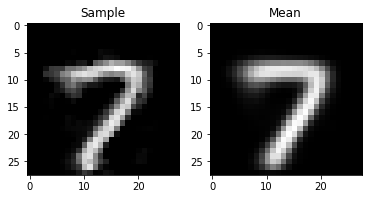

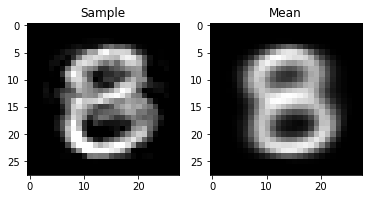

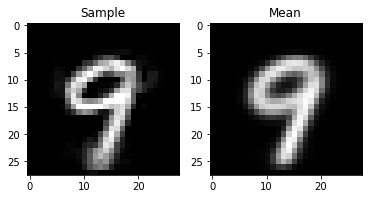

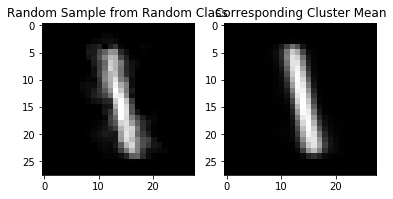

In [4]:
if __name__ == '__main__':
  X, Y = get_mnist()
  clf = BayesClassifier()
  clf.fit(X, Y)

  for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned

    sample, mean = clf.sample_given_y(k)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

  # generate a random sample
  sample, mean = clf.sample()
  plt.subplot(1,2,1)
  plt.imshow(sample, cmap='gray')
  plt.title("Random Sample from Random Class")
  plt.subplot(1,2,2)
  plt.imshow(mean, cmap='gray')
  plt.title("Corresponding Cluster Mean")
  plt.show()